<a href="https://colab.research.google.com/github/Elman295/label_to_image/blob/main/Label_to_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data = tf.keras.datasets.mnist 

(x_train, y_train), (x_test, y_test) = data.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train.dtype

dtype('uint8')

In [ ]:
y_train[0]

5

In [ ]:
x_train = x_train.astype("float16")
x_train.dtype

dtype('float16')

In [ ]:
y_train = y_train.astype("float16") 
y_train.dtype

dtype('float16')

In [ ]:
def make_pic_from_label(label):
  pic = tf.random.normal(shape = (28,28,1),mean = label)
  return pic

In [ ]:
p = make_pic_from_label(1)
p

<tf.Tensor: shape=(28, 28, 1), dtype=float32, numpy=
array([[[ 2.09262514e+00],
        [ 7.49769032e-01],
        [ 3.24106097e-01],
        [ 1.12352145e+00],
        [ 1.04235542e+00],
        [ 7.93544769e-01],
        [ 3.41033161e-01],
        [ 1.42826879e+00],
        [ 2.05331922e-01],
        [ 1.68767869e+00],
        [ 2.23390412e+00],
        [ 3.82657933e+00],
        [ 2.48719978e+00],
        [ 1.16669345e+00],
        [ 2.21670866e+00],
        [ 2.12229395e+00],
        [ 7.35247970e-01],
        [ 5.61134338e-01],
        [ 1.83207679e+00],
        [ 3.15157580e+00],
        [-4.36402082e-01],
        [ 1.04391432e+00],
        [ 8.56344700e-02],
        [ 7.15183020e-01],
        [ 6.04687333e-01],
        [ 2.30147219e+00],
        [ 1.09355044e+00],
        [ 1.77828205e+00]],

       [[ 1.29507327e+00],
        [ 1.22399414e+00],
        [-4.36353683e-02],
        [ 2.28470826e+00],
        [ 5.84825993e-01],
        [ 1.74658930e+00],
        [-1.83693051e-01],


In [ ]:
class l_to_i (tf.keras.models.Model):
  def __init__(self):
    super(l_to_i,self).__init__() 
    self.conv1 = tf.keras.layers.Conv2D(filters = 512, kernel_size = (3,3),activation = "leaky_relu",input_shape = (28,28,1))
    self.conv2 = tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3),activation = "leaky_relu")
    self.conv3 = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),activation = "leaky_relu")
    self.conv4 = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),activation = "leaky_relu")
    self.conv5 = tf.keras.layers.Conv2D(filters = 1, kernel_size = (3,3),activation = "leaky_relu")
    self.flatten = tf.keras.layers.Flatten() 
    self.d1 = tf.keras.layers.Dense(28*28, activation = "leaky_relu")
    self.reshape = tf.keras.layers.Reshape(target_shape=(28,28)) 

  def call (self,x):
    x = self.conv1(x) 
    x = self.conv2(x) 
    x = self.conv3(x)
    x = self.conv4(x)
    x = self.conv5(x)
    x = self.flatten(x) 
    x = self.d1(x) 
    res = self.reshape(x)
    return res 

    


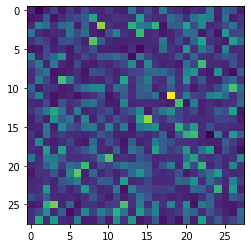

In [ ]:
sample_label = make_pic_from_label(label = 1)
model = l_to_i()
generated_image = model(sample_label.numpy().reshape(1,28,28,1), training = False) 
plt.imshow(generated_image.numpy().reshape(28,28)) 
plt.show()

In [ ]:
generated_image.shape

TensorShape([1, 28, 28])

In [ ]:
model.summary()

Model: "l_to_i_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_247 (Conv2D)         multiple                  5120      
                                                                 
 conv2d_248 (Conv2D)         multiple                  1179904   
                                                                 
 conv2d_249 (Conv2D)         multiple                  295040    
                                                                 
 conv2d_250 (Conv2D)         multiple                  73792     
                                                                 
 conv2d_251 (Conv2D)         multiple                  577       
                                                                 
 flatten_55 (Flatten)        multiple                  0         
                                                                 
 dense_55 (Dense)            multiple                  25

In [ ]:
model.trainable_variables

[<tf.Variable 'l_to_i_55/conv2d_247/kernel:0' shape=(3, 3, 1, 512) dtype=float32, numpy=
 array([[[[ 2.4773866e-02,  1.2817889e-02, -1.8464554e-02, ...,
            3.0343037e-02,  6.5436512e-03,  1.8364202e-02]],
 
         [[-1.5700432e-02, -3.3951610e-02,  3.1814929e-02, ...,
           -2.3822777e-02,  2.6240133e-02, -1.9709889e-02]],
 
         [[ 3.2364424e-02, -2.6847286e-02, -1.0826625e-03, ...,
            4.2591803e-03,  8.0402941e-05,  3.2733601e-02]]],
 
 
        [[[-3.5066538e-02, -8.5054748e-03,  3.4411404e-02, ...,
            3.4496952e-02,  2.7436119e-02,  6.4285509e-03]],
 
         [[-1.5843734e-03, -1.0184281e-02,  9.3501620e-03, ...,
            1.2405820e-02, -2.6396774e-03,  9.5659532e-03]],
 
         [[-2.8087772e-02,  1.8594429e-02, -1.3166754e-02, ...,
            3.3119645e-02, -3.3377778e-02, -1.0929165e-02]]],
 
 
        [[[-9.7411741e-03,  3.5051588e-02, -3.5157144e-02, ...,
           -2.8540282e-02,  1.6650818e-02, -2.3765206e-02]],
 
         [[ 2.76

In [ ]:
optimizer_fn = tf.keras.optimizers.Adam() 
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits = True)

In [ ]:
train_loss = tf.metrics.Mean(name = "train_loss") 
test_loss = tf.metrics.Mean(name = "test_loss")

In [ ]:
@tf.function
def train_step(image,label):

  with tf.GradientTape() as tape:
    label_matrix = make_pic_from_label(label)
    predicted_image = model(tf.reshape(tensor = label_matrix, shape = (1,28,28,1)), training = True)
    loss =  loss_fn(tf.reshape(image, shape = (28,28)),tf.reshape(tensor = predicted_image, shape = (28,28))) 
    gradient = tape.gradient(loss,model.trainable_variables)
    optimizer_fn.apply_gradients(zip(gradient,model.trainable_variables))


  train_loss(loss)

In [ ]:
@tf.function
def test_step(image,label):
  label_matrix = make_pic_from_label(label)
  predicted_image = model(tf.reshape(tensor = label_matrix, shape = (1,28,28,1)), training = False)
  loss = loss_fn(tf.reshape(image, shape = (28,28)),tf.reshape(tensor = predicted_image, shape = (28,28)))

  test_loss(loss)

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices(tensors = (x_train[:1000],y_train[:1000].astype("float32")))
test_ds = tf.data.Dataset.from_tensor_slices(tensors = (x_test[:1000],y_test[:1000].astype("float32")))

In [ ]:
EPOCHS = 10 


for epoch in range(EPOCHS):

  train_loss.reset_state()
  test_loss.reset_state()

  for image,label in train_ds:
    train_step(image,label) 

  for image,label in test_ds:
    test_step(image,label) 



  print(f"epoch : {epoch+1}")
  print(f"train_loss : {train_loss.result()}")
  print(f"test_loss : {test_loss.result()}")



epoch : 1
train_loss : 4000839077199872.0
test_loss : 6.310439729678516e+18
epoch : 2
train_loss : 3.55549624829739e+17
test_loss : 2.8237365594254895e+20
epoch : 3
train_loss : 3.7208732424753644e+18
test_loss : 2.107173607789174e+21
epoch : 4
train_loss : 1.7269756458593944e+19
test_loss : 8.116103521670584e+21
epoch : 5
train_loss : 5.3166506529108525e+19
test_loss : 2.252113264219313e+22
epoch : 6
train_loss : 1.289298593729206e+20
test_loss : 5.099574476859316e+22
epoch : 7
train_loss : 2.6912364362635988e+20
test_loss : 1.0118133700021864e+23
epoch : 8
train_loss : 5.035053938272769e+20
test_loss : 1.8294626889815784e+23
epoch : 9
train_loss : nan
test_loss : nan
epoch : 10
train_loss : nan
test_loss : nan


1/1 [==============================] - 0s 252ms/step


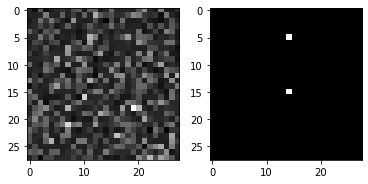

In [ ]:
i = 7
sample_label = make_pic_from_label(label = i)
model = l_to_i()
generated_image = model.predict(sample_label.numpy().reshape(1,28,28,1)) 
plt.subplot(1,2,1)
plt.imshow(generated_image.reshape(28,28), cmap = "gray") 
plt.subplot(1,2,2)
plt.imshow(x_train[i].astype("uint8"), cmap = "gray")
plt.show()